In [1]:
!pip install uproot awkward 
from uproot_io import Events, View
import numpy as np
import matplotlib.pyplot as plt
import features as f
cheated_0 = Events('CheatedRecoFile_0.root')
sliced_0 = f.slice_events(cheated_0)
cheated_0_candidates = f.identify_candidate(cheated_0)

Events sliced, 499617 events split across 9505 unique event ids


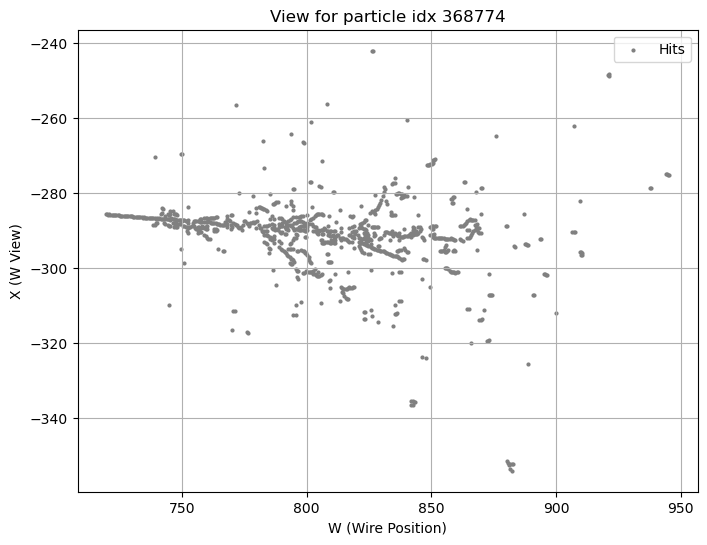

In [2]:
f.plot_idx(cheated_0, 368774)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

def plot_branch_vertex_1(events, event_idx):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    # clustering method
    data = np.column_stack((w_hits, x_hits))
    kmeans = KMeans(n_clusters=3).fit(data)  # Assuming 3 branches in Y-shape
    center = kmeans.cluster_centers_
    #print(f'Calculated Branch Vertices: {center}')

    if len(w_hits) == len(x_hits) and len(w_hits) > 2:
        plt.figure(figsize = (16,12))
        plt.scatter(w_hits, x_hits, c='grey', s=4, label='Hits')
        plt.scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')
        plt.scatter(center[:, 0], center[:, 1], c='b', marker='x', s=25, label='Possible Branch vtx')
        plt.title(f'KMean clustering to find branch vtx, idx: {event_idx}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else: print('Less than 3 hits')

def plot_branch_vertex_2(events, event_idx):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # DBSCAN Clustering (eps: search radius, min_samples: min points per cluster)
    dbscan = DBSCAN(eps=1, min_samples=1).fit(data)
    labels = dbscan.labels_

    # Identify cluster centers (mean position of each cluster)
    unique_labels = set(labels) - {-1}  # Ignore noise (-1)
    centers = np.array([data[labels == lbl].mean(axis=0) for lbl in unique_labels])

    #print(f'Calculated Branch Vertices: {centers}')

    if len(w_hits) > 2:
        plt.figure(figsize=(16,12))
        plt.scatter(w_hits, x_hits, c='grey', s=4, label='Hits')
        plt.scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')
        for i, lbl in enumerate(unique_labels):
            plt.scatter(data[labels == lbl, 0], data[labels == lbl, 1], s=5, alpha=0.4)
        plt.scatter(centers[:, 0], centers[:, 1], c='b', marker='x', s=25, label='Branch vtx')

        plt.title(f'DBSCAN clustering to find branch vtx, idx: {event_idx}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print('Less than 3 hits')

def plot_branch_vertex_3(events, event_idx):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # DBSCAN Clustering (eps: search radius, min_samples: min points per cluster)
    dbscan = DBSCAN(eps=1, min_samples=1).fit(data)
    labels = dbscan.labels_

    # Identify cluster centers (mean position of each cluster)
    unique_labels = set(labels) - {-1}  # Ignore noise (-1)
    centers = np.array([data[labels == lbl].mean(axis=0) for lbl in unique_labels])

    #print(f'Calculated Branch Vertices: {centers}')

    # Find the point in Cluster 0 that is furthest from (w_vtx, x_vtx)
    if 0 in unique_labels:  # Ensure cluster 0 exists
        cluster_0_points = data[labels == 0]  # Extract points in cluster 0

        # Compute distances to (w_vtx, x_vtx)
        distances = np.linalg.norm(cluster_0_points - np.array([w_vtx, x_vtx]), axis=1)

        # Get the furthest point
        max_distance_idx = np.argmax(distances)
        furthest_point = cluster_0_points[max_distance_idx]
    else:
        furthest_point = None

    # Plot results
    if len(w_hits) > 2:
        plt.figure(figsize=(16,12))
        plt.scatter(w_hits, x_hits, c='grey', s=4, label='Hits')
        plt.scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')

        for i, lbl in enumerate(unique_labels):
            plt.scatter(data[labels == lbl, 0], data[labels == lbl, 1], s=5, alpha=0.4)

        plt.scatter(centers[:, 0], centers[:, 1], c='b', marker='x', s=25, label='Branch vtx')

        if furthest_point is not None:
            plt.scatter(furthest_point[0], furthest_point[1], facecolors='none', edgecolors='purple', linewidth=2, marker='o', s=100, label='Furthest in Cluster 0')

        plt.title(f'DBSCAN clustering to find branch vtx, idx: {event_idx}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.legend()
        plt.grid(True)
        plt.show()

        if furthest_point is not None:
            print(f'Furthest point in Cluster 0: {furthest_point}')
    else:
        print('Less than 3 hits')


plot_branch_vertex_1(cheated_0, 368774)
plot_branch_vertex_2(cheated_0, 368774)
plot_branch_vertex_3(cheated_0, 368774)

In [ ]:
showers_0 = [r[1] for r in cheated_0_candidates if not cheated_0.is_true_track[r[1]]]
print(f'There are {len(showers_0)} candidate showers in cheated_0')

In [ ]:
plot_branch_vertex_3(cheated_0, showers_0[543])

In [ ]:
def plot_branch_vertex_4(events, event_idx):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # DBSCAN Clustering (eps: search radius, min_samples: min points per cluster)
    dbscan = DBSCAN(eps=1, min_samples=1).fit(data)
    labels = dbscan.labels_

    # Identify cluster centers (mean position of each cluster)
    unique_labels = list(set(labels) - {-1})  # Convert to list to allow indexing
    centers = np.array([data[labels == lbl].mean(axis=0) for lbl in unique_labels])

    # Compute the distances between the neutrino vertex and the cluster centers
    distances_to_centers = np.linalg.norm(centers - np.array([w_vtx, x_vtx]), axis=1)

    # Find the closest cluster (the cluster with the minimum distance)
    closest_cluster_idx = np.argmin(distances_to_centers)
    closest_center = centers[closest_cluster_idx]

    # Find the points in the closest cluster
    closest_cluster_points = data[labels == unique_labels[closest_cluster_idx]]

    # Compute distances from each point in the closest cluster to the neutrino vertex
    distances = np.linalg.norm(closest_cluster_points - np.array([w_vtx, x_vtx]), axis=1)

    # Get the furthest point in the closest cluster
    max_distance_idx = np.argmax(distances)
    furthest_point = closest_cluster_points[max_distance_idx]

    # Plot results
    if len(w_hits) > 2:
        plt.figure(figsize=(16,12))
        plt.scatter(w_hits, x_hits, c='grey', s=4, label='Hits')
        plt.scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')

        # Plot all clusters
        for i, lbl in enumerate(unique_labels):
            plt.scatter(data[labels == lbl, 0], data[labels == lbl, 1], s=5, alpha=0.4)

        # Plot branch vertices (cluster centers)
        #plt.scatter(centers[:, 0], centers[:, 1], c='b', marker='x', s=25, label='Branch vtx')

        # Plot the closest cluster's furthest point
        if furthest_point is not None:
            plt.scatter(furthest_point[0], furthest_point[1], facecolors='none', edgecolors='purple', linewidth=2, marker='o', s=100, label='Furthest in Closest Cluster')

        plt.title(f'DBSCAN clustering to find branch vtx, idx: {event_idx}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.legend()
        plt.grid(True)
        plt.show()

        if furthest_point is not None:
            print(f'Furthest point in closest cluster: {furthest_point}')
    else:
        print('Less than 3 hits')

plot_branch_vertex_4(cheated_0, showers_0[543])

In [ ]:
# perhaps we need to go back to basics before looking at DBSCAN.

In [ ]:
from scipy.stats import gaussian_kde

def find_density_peak(w_hits, x_hits, w_vtx, x_vtx, num_bins=30):
    # Compute radial distances from neutrino vertex
    distances = np.sqrt((w_hits - w_vtx) ** 2 + (x_hits - x_vtx) ** 2)
    
    # Perform Kernel Density Estimation (KDE)
    kde = gaussian_kde(distances)
    dist_range = np.linspace(0, max(distances), num_bins)
    density = kde(dist_range)
    
    # Find the distance where density peaks
    peak_idx = np.argmax(density)
    peak_distance = dist_range[peak_idx]
    
    return peak_distance

def plot_branch_vertex_5(events, event_idx, n_clusters=3):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]
    
    if len(w_hits) == len(x_hits) and len(w_hits) > 2:
        # Find the radial distance where density is highest
        peak_distance = find_density_peak(w_hits, x_hits, w_vtx, x_vtx)
        
        # Filter hits within the peak distance to form clusters
        distances = np.sqrt((w_hits - w_vtx) ** 2 + (x_hits - x_vtx) ** 2)
        mask = distances <= peak_distance
        filtered_hits = np.column_stack((w_hits[mask], x_hits[mask]))
        
        # Apply KMeans clustering to find branch points
        if len(filtered_hits) >= n_clusters:
            kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
            kmeans.fit(filtered_hits)
            centers = kmeans.cluster_centers_
        else:
            centers = np.array([[w_vtx, x_vtx]])  # Default to vertex if not enough points
        
        # Plot results
        plt.figure(figsize=(16,12))
        plt.scatter(w_hits, x_hits, c='grey', s=4, label='Hits')
        plt.scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')
        plt.scatter(centers[:, 0], centers[:, 1], c='b', marker='x', s=25, label='Possible Branch vtx')
        plt.title(f'KMean clustering to find branch vtx, idx: {event_idx}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print('Less than 3 hits')

#for i in range(20):
#    plot_branch_vertex_5(cheated_0, showers_0[i])

In [ ]:
# lets go back to clustering and see what the events give us.

def cluster_idx(events, event_idx, epsilon, min_n_samples):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # DBSCAN Clustering (eps: search radius, min_samples: min points per cluster)
    dbscan = DBSCAN(eps=epsilon, min_samples=min_n_samples).fit(data)
    labels = dbscan.labels_
    unique_labels = set(labels)
    
    # Plot results
    if len(w_hits) > 2:
        plt.figure(figsize=(16,12))
        plt.scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')
        
        for label in unique_labels:
            if label == -1:
                cluster_points = data[labels == label]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, facecolor='white', edgecolor='k', label='Noise', marker='s')
            else:
                cluster_points = data[labels == label]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=5)
        
        plt.title(f'DBSCAN clustering; idx: {event_idx}, eps: {epsilon}, min_samples: {min_n_samples}, # Clusters: {len(unique_labels)}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print('Less than 3 hits')


eps_array = [1, 1.5, 2, 2.5, 3]
min_array = [2, 3]

from itertools import product

#for i, j in product(min_array, eps_array):
#    cluster_idx(cheated_0, showers_0[311], j, i)

In [ ]:
#for idx in showers_0:
#    if len(cheated_0.reco_hits_w[idx]) > 15: # quality cut
#        cluster_idx(cheated_0, idx, 1, 2)

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def lowess_filter(events, event_idx, frac=0.2):
    # Get hits and vertex positions
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # Apply LOWESS smoothing (frac: the smoothing parameter)
    smoothed = lowess(data[:, 1], data[:, 0], frac=frac)

    # Plot results
    if len(w_hits) > 2:
        plt.figure(figsize=(16, 12))
        
        # Plot neutrino vertex (start point)
        plt.scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')

        # Plot the LOWESS smoothed line
        plt.plot(smoothed[:, 0], smoothed[:, 1], c='orange', label='LOWESS Smoothed')

        # Optionally, plot the raw data points
        plt.scatter(w_hits, x_hits, s=5, c='grey', label='Raw hits')

        plt.title(f'LOWESS Smoothing; idx: {event_idx}, frac: {frac}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print('Less than 3 hits')

In [ ]:
lowess_filter(cheated_0, showers_0[74])
lowess_filter(cheated_0, showers_0[74], frac=0.01)

In [ ]:
def lowess_deviations(events, event_idx, frac=0.2):
    # Get hits and vertex positions
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # Apply LOWESS smoothing (frac: the smoothing parameter)
    smoothed = lowess(data[:, 1], data[:, 0], frac=frac)

    # Calculate the absolute deviations
    x_lowess = smoothed[:, 1]
    deviations = np.abs(x_hits - x_lowess)

    # Plot results
    if len(w_hits) > 2:
        plt.figure(figsize=(12, 9))

        # Plot the deviations (the line for abs(x_hits - x_lowess))
        plt.scatter(w_hits, deviations, c='blue', label='Deviation (abs(x_hits - x_lowess))', s=10)

        plt.title(f'LOWESS Deviation; idx: {event_idx}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print('Less than 3 hits')

In [ ]:
lowess_deviations(cheated_0, showers_0[74])

In [ ]:
# try KMeans again

#for idx in showers_0:
#    if len(cheated_0.reco_hits_w[idx]) > 15: # quality cut
#        plot_branch_vertex_5(cheated_0, idx)

In [ ]:
# try a multi level solution. 1: DBSCAN to reduce noise with varying parameters; 2: go from there?

def reduced_noise_idx(events, event_idx, epsilon, min_n_samples):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # DBSCAN Clustering (eps: search radius, min_samples: min points per cluster)
    dbscan = DBSCAN(eps=epsilon, min_samples=min_n_samples).fit(data)
    labels = dbscan.labels_
    unique_labels = set(labels)

    # Separate noise and clustered points
    noise_mask = labels == -1
    clustered_mask = labels != -1
    noise_points = data[noise_mask]
    clustered_points = data[clustered_mask]
    
    # Plot results
    if len(w_hits) > 2:
        plt.figure(figsize=(16,12))
        plt.scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')
        
        # Plot noise separately
        if len(noise_points) > 0:
            plt.scatter(noise_points[:, 0], noise_points[:, 1], s=10, facecolor='white', edgecolor='k', label='Noise', marker='s')
        
        # Plot clustered points separately
        if len(clustered_points) > 0:
            plt.scatter(clustered_points[:, 0], clustered_points[:, 1], s=5, c='blue', label='Clustered Hits')
        
        plt.title(f'DBSCAN clustering; idx: {event_idx}, eps: {epsilon}, min_samples: {min_n_samples}, # Clusters: {len(unique_labels)}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print('Less than 3 hits')

In [ ]:
#for idx in showers_0:
#    if len(cheated_0.reco_hits_w[idx]) > 15: # quality cut
#        reduced_noise_idx(cheated_0, idx, 1, 2)

In [ ]:
f.plot_idx_adc(cheated_0, 5111)
f.plot_idx_adc(cheated_0, 5928)
f.plot_idx_adc(cheated_0, 5987)

In [ ]:
def plot_branch_vertex_6(events, event_idx):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    pdg = events.mc_pdg[event_idx]
    c_class = 'b'
    event = 'ERROR: Not e/gamma'
    
    if pdg in [-11, 11]:
        c_class = 'y'
        event = 'Electron'
    elif pdg == 22:
        c_class = 'g'
        event = 'Photon'

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # DBSCAN Clustering (eps: search radius, min_samples: min points per cluster)
    dbscan = DBSCAN(eps=1, min_samples=2).fit(data)
    labels = dbscan.labels_
    unique_labels = set(labels)

    # Separate noise and clustered points
    noise_mask = labels == -1
    clustered_mask = labels != -1
    noise_points = data[noise_mask]
    clustered_points = data[clustered_mask]

    w_clustered = clustered_points[:, 0]
    x_clustered = clustered_points[:, 1]
    
    # Identify branch vertex by scanning radially outward
    branch_vertex = None
    if len(clustered_points) > 0:
        distances = np.linalg.norm(clustered_points - np.array([w_vtx, x_vtx]), axis=1)
        sorted_indices = np.argsort(distances)
        sorted_points = clustered_points[sorted_indices]
        
        # Compute local density (number of points in a sliding window)
        window_size = 10
        density = [np.sum((distances >= d - 1) & (distances <= d + 1)) for d in distances[sorted_indices]]
        
        # Detect sharp increase in density
        density_diff = np.diff(density)
        branch_idx = np.argmax(density_diff) if len(density_diff) > 0 else 0
        branch_vertex = sorted_points[branch_idx]
    
    # Plot results
    if len(w_hits) > 2:
        fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns
        ax[0].scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')
        
        # Plot noise separately
        if len(noise_points) > 0:
            ax[0].scatter(noise_points[:, 0], noise_points[:, 1], s=10, facecolor='white', edgecolor='k', label='Noise', marker='s')
        
        # Plot clustered points in grey
        if len(clustered_points) > 0:
            ax[0].scatter(w_clustered, x_clustered, s=5, c=c_class, label=f'Clustered Hits, {event}')
        
        ax[0].set_title(f'DBSCAN Noise plot; idx: {event_idx}. Event is a {event}')
        ax[0].set_ylabel('X (W View)')
        ax[0].set_xlabel('W (Wire Position)')
        ax[0].legend()
        ax[0].grid(True)
        
        # Plot branch vertex separately on ax[1]
        ax[1].scatter(w_clustered, x_clustered, s=5, c='grey', label='Clustered Hits')
        if branch_vertex is not None:
            ax[1].scatter(branch_vertex[0], branch_vertex[1], facecolors='none', edgecolors='purple', linewidth=2, marker='o', s=100, label='Branch Vertex')
        
        ax[1].set_title('Branch Vertex Detection')
        ax[1].set_ylabel('X (W View)')
        ax[1].set_xlabel('W (Wire Position)')
        ax[1].legend()
        ax[1].grid(True)
        
        plt.show()
    else:
        print('Less than 3 hits')


In [ ]:
plot_branch_vertex_6(cheated_0, showers_0[525])

In [ ]:
def plot_branch_vertex_7(events, event_idx, dEdx_radius):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    if len(w_hits) < 16:
        print('Does not meet 15 hit cutoff')
        return
    
    pdg = events.mc_pdg[event_idx]
    c_class = 'b'
    event = 'ERROR: Not e/gamma'
    
    if pdg in [-11, 11]:
        c_class = '#EEEE00'
        event = 'Electron'
    elif pdg == 22:
        c_class = 'g'
        event = 'Photon'

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # DBSCAN Clustering (eps: search radius, min_samples: min points per cluster)
    dbscan = DBSCAN(eps=1, min_samples=2).fit(data)
    labels = dbscan.labels_
    unique_labels = set(labels)

    # Separate noise and clustered points
    noise_mask = labels == -1
    clustered_mask = labels != -1
    noise_points = data[noise_mask]
    clustered_points = data[clustered_mask]

    w_clustered = clustered_points[:, 0]
    x_clustered = clustered_points[:, 1]
    smoothed = lowess(x_clustered, w_clustered, 0.3)
    
    # Identify branch vertex by scanning radially outward
    branch_vertex = None
    distances = None
    
    if len(clustered_points) > 0:
        distances = np.linalg.norm(clustered_points - np.array([w_vtx, x_vtx]), axis=1)

        # bins for a histogram
        bins = np.linspace(0, max(distances), 26)
        
        counts, bin_edges = np.histogram(distances, bins=bins)

        decline_idx = 0
        for i in range(len(counts) - 1):  # len(counts) - 1 to avoid out-of-bounds error
            if counts[i] > counts[i + 1]:
                decline_idx = i
                break
        max_bin_index = np.argmax(counts)
        distance = bin_edges[decline_idx]
        closest_idx = np.argmin(np.abs(distances - distance))
        branch_vertex = clustered_points[closest_idx]

        branch_idx = (np.abs(smoothed[:, 0] - branch_vertex[0])).argmin()
        branch_vertex[1] = smoothed[branch_idx, 1]

    # Plot results
    if len(w_hits) > 2:
        fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns
        ax[0].scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')
        
        # Plot noise separately
        if len(noise_points) > 0:
            ax[0].scatter(noise_points[:, 0], noise_points[:, 1], s=8, facecolor='white', edgecolor='k', label='Noise', marker='s')
        
        # Plot clustered points in grey
        if len(clustered_points) > 0:
            ax[0].scatter(w_clustered, x_clustered, s=3, c=c_class, label=f'Clustered Hits, {event}')
            ax[0].plot(smoothed[:, 0], smoothed[:, 1], c='orange', label='LOWESS Smooth plot', linewidth=1)

        if branch_vertex is not None:
            ax[0].scatter(branch_vertex[0], branch_vertex[1], facecolors='none', edgecolors='purple', linewidth=1, marker='o', s=50, label='Branch Vertex')
            y_low, y_high = ax[0].get_ylim()
            y1 = (branch_vertex[1] - dEdx_radius - y_low) / (y_high - y_low)
            y2 = (branch_vertex[1] + dEdx_radius - y_low) / (y_high - y_low)
            y1 = max(0, min(1, y1))
            y2 = max(0, min(1, y2))
            ax[0].axvline(branch_vertex[0], linewidth=1, c='blue', label=f'dE/dx Bounds: {dEdx_radius}cm', linestyle='--', ymin=y1, ymax=y2)

            theta = None
            if w_vtx < np.mean(w_hits):
                # -pi/2 to pi/2 for a right-facing semi-circle
                theta = np.linspace(-np.pi / 2, np.pi / 2, 100)
            else: theta = np.linspace(np.pi / 2, 3*np.pi / 2, 100) # left-facing
            
            # Parametric equations of the semi-circle
            x_sc = branch_vertex[0] + dEdx_radius * np.cos(theta)
            y_sc = branch_vertex[1] + dEdx_radius * np.sin(theta)
            
            ax[0].plot(x_sc, y_sc, linewidth=1, c='blue', linestyle='--')
        
        ax[0].set_title(f'Branch Vertex Plot; idx: {event_idx}. Event is a {event}')
        ax[0].set_ylabel('X (W View)')
        ax[0].set_xlabel('W (Wire Position)')
        ax[0].legend()
        ax[0].grid(True)
        
        # Plot branch vertex separately on ax[1]
        ax[1].hist(distances, bins=bins, edgecolor='k', label='Distances', alpha=0.7, linewidth=0.5)        
        ax[1].set_title('Histogram of distances to neutrino vtx')
        ax[1].set_ylabel('Frequency')
        ax[1].set_xlabel('Distance from nu_vtx')
        ax[1].legend()
        ax[1].grid(False)
        
        plt.show()
    else:
        print('Less than 3 hits')

In [ ]:
import random
random_indices = random.sample(range(len(showers_0)), 20)

for i in random_indices:
    plot_branch_vertex_7(cheated_0, showers_0[i], 5)

In [ ]:
def plot_branch_vertex_8(events, event_idx, dEdx_radius):
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]

    if len(w_hits) < 16:
        print('Does not meet 15 hit cutoff')
        return
    
    pdg = events.mc_pdg[event_idx]
    c_class = 'b'
    event = 'ERROR: Not e/gamma'
    
    if pdg in [-11, 11]:
        c_class = '#EEEE00'
        event = 'Electron'
    elif pdg == 22:
        c_class = 'g'
        event = 'Photon'

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # DBSCAN Clustering (eps: search radius, min_samples: min points per cluster)
    dbscan = DBSCAN(eps=1, min_samples=2).fit(data)
    labels = dbscan.labels_
    unique_labels = set(labels)

    # Separate noise and clustered points
    noise_mask = labels == -1
    clustered_mask = labels != -1
    noise_points = data[noise_mask]
    clustered_points = data[clustered_mask]

    w_clustered = clustered_points[:, 0]
    x_clustered = clustered_points[:, 1]
    smoothed = lowess(x_clustered, w_clustered, 0.3)
    
    # Identify branch vertex by scanning radially outward
    branch_vertex = None
    
    if len(clustered_points) > 0:
        # clustering method
        data = np.column_stack((w_clustered, x_clustered))
        kmeans = KMeans(n_clusters=5, random_state=42).fit(data)
        centers = kmeans.cluster_centers_
        distances = [(c[0] - w_vtx)**2 + (c[1] - x_vtx)**2 for c in centers]
        branch_vertex = centers[np.argmin(distances)]

    # Plot results
    if len(w_hits) > 2:
        fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns
        ax[0].scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')
        
        # Plot noise separately
        if len(noise_points) > 0:
            ax[0].scatter(noise_points[:, 0], noise_points[:, 1], s=8, facecolor='white', edgecolor='k', label='Noise', marker='s')
        
        # Plot clustered points in grey
        if len(clustered_points) > 0:
            ax[0].scatter(w_clustered, x_clustered, s=3, c=c_class, label=f'Clustered Hits, {event}')
            ax[0].plot(smoothed[:, 0], smoothed[:, 1], c='orange', label='LOWESS Smooth plot', linewidth=1)

        if branch_vertex is not None:
            ax[0].scatter(branch_vertex[0], branch_vertex[1], facecolors='none', edgecolors='purple', linewidth=1, marker='o', s=50, label='Branch Vertex')
            ax[0].scatter(centers[:, 0], centers[:, 1], marker='x', s=25, label='KMean Clusters')
            y_low, y_high = ax[0].get_ylim()
            y1 = (branch_vertex[1] - dEdx_radius - y_low) / (y_high - y_low)
            y2 = (branch_vertex[1] + dEdx_radius - y_low) / (y_high - y_low)
            y1 = max(0, min(1, y1))
            y2 = max(0, min(1, y2))
            ax[0].axvline(branch_vertex[0], linewidth=1, c='blue', label=f'dE/dx Bounds: {dEdx_radius}cm', linestyle='--', ymin=y1, ymax=y2)

            theta = None
            if w_vtx < np.mean(w_hits):
                # -pi/2 to pi/2 for a right-facing semi-circle
                theta = np.linspace(-np.pi / 2, np.pi / 2, 100)
            else: theta = np.linspace(np.pi / 2, 3*np.pi / 2, 100) # left-facing
            
            # Parametric equations of the semi-circle
            x_sc = branch_vertex[0] + dEdx_radius * np.cos(theta)
            y_sc = branch_vertex[1] + dEdx_radius * np.sin(theta)
            
            ax[0].plot(x_sc, y_sc, linewidth=1, c='blue', linestyle='--')
        
        ax[0].set_title(f'Branch Vertex Plot; idx: {event_idx}. Event is a {event}')
        ax[0].set_ylabel('X (W View)')
        ax[0].set_xlabel('W (Wire Position)')
        ax[0].legend()
        ax[0].grid(True)
        
        
        
        plt.show()
    else:
        print('Less than 3 hits')

In [ ]:
random_indices = random.sample(range(len(showers_0)), 20)

for i in random_indices:
    plot_branch_vertex_8(cheated_0, showers_0[i], 5)

In [ ]:
# Approach was wrong, need to find branch vertex yes, but the points needed must be from shower vertex until branch vertex, not afterwards.

def dEdx_points(events, event_idx, cone_angle, show_plot=False):
    w_hits = events.reco_hits_w[event_idx]

    # Quality Check
    if not len(w_hits) > 15:
        print('Does not meet 15 hit cutoff')
        return
        
    x_hits = events.reco_hits_x_w[event_idx]
    w_vtx = events.neutrino_vtx_w[event_idx]
    x_vtx = events.neutrino_vtx_x[event_idx]
    
    pdg = events.mc_pdg[event_idx]
    c_class = 'b'
    event = 'ERROR: Not e/gamma'
    
    if pdg in [-11, 11]:
        c_class = '#EEEE00'
        event = 'Electron'
    elif pdg == 22:
        c_class = 'g'
        event = 'Photon'

    # Convert hits to array
    data = np.column_stack((w_hits, x_hits))

    # DBSCAN Clustering (eps: search radius, min_samples: min points per cluster)
    dbscan = DBSCAN(eps=1, min_samples=2).fit(data)
    labels = dbscan.labels_
    unique_labels = set(labels)

    # Separate noise and clustered points
    noise_mask = labels == -1
    clustered_mask = labels != -1
    noise_points = data[noise_mask]
    clustered_points = data[clustered_mask]

    w_clustered = clustered_points[:, 0]
    x_clustered = clustered_points[:, 1]

    # Get a smoothed plot
    smoothed = lowess(x_clustered, w_clustered, 0.3)

    # make the validity cone
    slope, _ = np.polyfit(w_hits, x_hits, 1)
    theta_0 = np.arctan2(slope, 1)
    theta_u = theta_0 + cone_angle/2
    theta_l = theta_0 - cone_angle/2

    # Length of lines
    r = 30  # Adjust as needed
    
    # Compute line endpoints
    direction = 1
    if np.mean(w_hits) < w_vtx:
        direction = -1
    w_u = w_vtx + r * np.cos(theta_u) * direction
    x_u = x_vtx + r * np.sin(theta_u) * direction
    
    w_l = w_vtx + r * np.cos(theta_l) * direction
    x_l = x_vtx + r * np.sin(theta_l) * direction
    
    # Branch Vertex Algorithm (for now lets just simplify it)
    branch_idx = 0
    if len(w_hits) < 5:
        branch_idx = 1
    else: branch_idx = len(w_hits)//5
    branch_vertex = [w_hits[branch_idx], x_hits[branch_idx]]

    angles = np.arctan2(x_clustered - x_vtx, w_clustered - w_vtx)
    distance = [np.sqrt((w - w_vtx)**2 + (x - x_vtx)**2) for (w, x) in clustered_points]
    branch_distance = np.sqrt((branch_vertex[0] - w_vtx)**2 + (branch_vertex[1] - x_vtx)**2)
    mask = None
    if direction == -1:
        mask = (theta_u <= angles) & (angles <= theta_l) & (distance < branch_distance)
    else: mask = (theta_l <= angles) & (angles <= theta_u) & (distance < branch_distance)

    #if not show_plot:
    #    return branch_vertex
    
    # Plot results
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns
    ax[0].scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')
    
    # Plot noise separately
    if len(noise_points) > 0:
        ax[0].scatter(noise_points[:, 0], noise_points[:, 1], s=8, facecolor='white', edgecolor='k', label='Noise', marker='s')
    
    # Plot clustered points
    if len(clustered_points) > 0:
        ax[0].scatter(w_clustered, x_clustered, s=3, c=c_class, label=f'Clustered Hits, {event}')
        ax[0].plot(smoothed[:, 0], smoothed[:, 1], c='orange', label='LOWESS Smooth plot', linewidth=1)
        ax[0].scatter(branch_vertex[0], branch_vertex[1], facecolors='none', edgecolors='purple', linewidth=1, marker='o', s=50, label='Branch Vertex')
        # Plot the lines
        ax[0].plot([w_vtx, w_u], [x_vtx, x_u], 'b--')  # Upper line
        ax[0].plot([w_vtx, w_l], [x_vtx, x_l], 'b--', label='Validity Cone')  # Lower line
        ax[0].set_title(f'Noise Reduction Plot; idx: {event_idx}. Event is a {event}')
        ax[0].set_ylabel('X (W View)')
        ax[0].set_xlabel('W (Wire Position)')
        ax[0].legend()
        ax[0].grid(True)

        ax[1].scatter(w_vtx, x_vtx, c='r', marker='x', s=25, label='Neutrino vtx')
        ax[1].scatter(w_hits, x_hits, s=3, c='grey', label='Hits')
        ax[1].scatter(w_clustered[mask], x_clustered[mask], s=5, c='purple', label='Identified Points')
        ax[1].legend()
        ax[1].grid(True)

    #return branch_vertex

In [ ]:
random_indices = random.sample(range(len(showers_0)), 20)

for i in random_indices:
    dEdx_points(cheated_0, showers_0[i], 2*np.pi/3, True)